y = x**3 > data > model > params > train > plot > error 

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.DataFrame( { 'val': [x for x in range(-500,500)], 'res': [x**3 for x in range(-500,500)]} )

In [3]:
df.head()

,val,res
0,-500,-125000000
1,-499,-124251499
2,-498,-123505992
3,-497,-122763473
4,-496,-122023936


---

In [106]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer, make_column_selector, make_column_transformer
from sklearn.model_selection import train_test_split

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, FunctionTransformer

from sklearn.linear_model import TweedieRegressor, LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [129]:
x_train, x_valid, y_train, y_valid = train_test_split(df.val, df.res, test_size=0.2, random_state=0)

In [130]:
def reshape(X):
    return np.reshape(X, (-1,1))

reshape = FunctionTransformer(reshape)

def log(X):
    return np.log(X)
log = FunctionTransformer(log)

#preprocessing = ColumnTransformer(transformers=[ ('reshape', reshape, make_column_selector('*')), ('log', log, make_column_selector('*'))])

#linear_model = LinearRegression()
forest = RandomForestRegressor(criterion='squared_error')
#w_model = TweedieRegressor()

#scaler = Pipeline(steps=[ ('reshape', reshape), ('scaler', StandardScaler())  ] )
#model = Pipeline(steps=[ ('reshape', reshape), ('model', linear_model)] )
model = Pipeline(steps=[ ('reshape', reshape), ('model', forest)] )


In [131]:
model.fit( x_train, y_train )

Pipeline(steps=[('reshape',
                 FunctionTransformer(func=<function reshape at 0x7f8d1a15dc60>)),
                ('model', RandomForestRegressor())])

In [132]:
predictions = model.predict( x_valid) 

In [133]:
def predict(inp):
    """Predicts third power of a given value or an array of values."""
    #inp = scaler.transform(inp)
    predicted = model.predict(inp)
    #predicted = scaler.inverse_transform(np.reshape(predicted, (-1,1)) )
    
    return predicted.astype('int64')

In [134]:
predict([10])

array([954])

In [135]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, mean_squared_log_error

In [136]:
y_valid[ y_valid < 0]

298     -8242408
27    -105823817
231    -19465109
306     -7301384
496          -64
         ...    
204    -25934336
435      -274625
5     -121287375
215    -23149125
150    -42875000
Name: res, Length: 98, dtype: int64

In [138]:
print( 'mean_absolute_error:', mean_absolute_error(y_valid, predictions) )
print( 'mean_absolute_percentage_error:', mean_absolute_percentage_error(y_valid, predictions) )
print( 'mean_squared_error:', mean_squared_error(y_valid, predictions) )
#mean_squared_log_error(y_valid, predictions) -> contains negative values

mean_absolute_error: 131233.2199999997
mean_absolute_percentage_error: 0.04497087689287134
mean_squared_error: 44901952647.1335


---

In [141]:
import matplotlib.pyplot as plt
import seaborn as sns

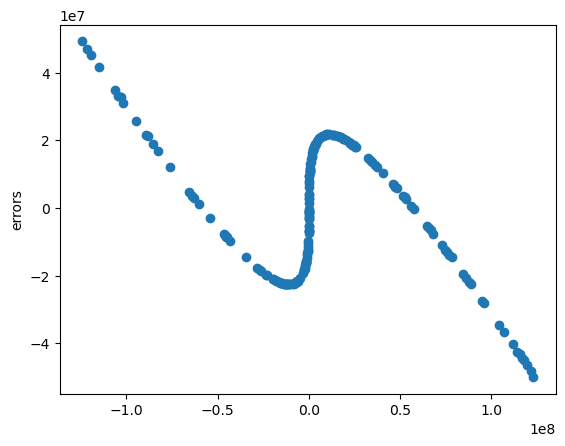

In [140]:
fig, ax = plt.subplots()
ax.scatter(predictions, errors)
#ax.scatter(predictions, y_valid, c='orange' )
#ax.scatter(predictions, y_valid)
ax.set_ylabel('errors')

plt.show()

<Axes: ylabel='res'>

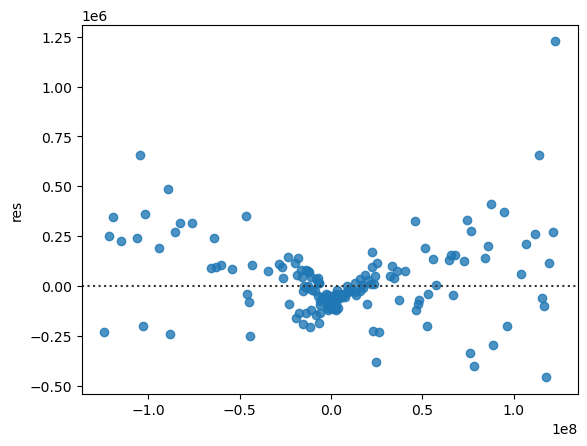

In [143]:
sns.residplot(x=predictions, y=y_valid)